### Libraries used in this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1- Dataset analysis and report on important statistics

In [2]:
# Load the datasets
train_data = pd.read_csv('Dataset-train-vf.csv')
test_data = pd.read_csv('Dataset-test-vf.csv')

print(train_data.head(), '\n')

   sample    x1  x2         x3   x4       x5       x6     x7       x8      x9  \
0       1  1353 NaN   1.142857   88  104.850  0.00727  0.443    7.997   6.990   
1       2  1107 NaN   4.857143  306  194.175  0.03778  0.363   34.002  12.945   
2       3   984 NaN   6.571429  368  208.575  0.05750  0.356   46.000  13.905   
3       4  1107 NaN   4.714286  297  175.725  0.03667  0.354   33.003  11.715   
4       5   123 NaN  33.571429  235  225.000  2.35000  0.923  235.000  15.000   

       x10   x11       x12   x13 x14     y  
0  8346.00   3.9  0.032695  0.05  C1   Low  
1   376.64  11.1  0.210526  3.15  C3   Low  
2   451.54  13.1  0.271930  3.10  C1   Low  
3   393.76  10.5  0.185008  2.85  C1   Low  
4  5805.82  21.7  0.187400  0.40  C4  High   



In [3]:
# Basic statistics for numerical training data
print("Description of numerical training data:")
print(train_data.describe())
print(train_data['y'].value_counts(), '\n')

# Basic statistics for categorical training data
print("\nUnique values in x14:", train_data['x14'].unique())

# Count the occurrences of each category in x14
x14_counts = train_data['x14'].value_counts()
print("Counts for each category in x14:\n", x14_counts)

Description of numerical training data:
            sample            x1          x2           x3             x4  \
count  1000.000000   1000.000000  102.000000  1000.000000    1000.000000   
mean    500.500000   1867.632000    0.501471    11.120714    1776.068000   
std     288.819436   4961.600027    0.281419    15.435723    9674.655032   
min       1.000000    123.000000    0.010000     0.142857       7.000000   
25%     250.750000    615.000000    0.262500     2.285714      80.000000   
50%     500.500000   1107.000000    0.480000     6.142857     297.000000   
75%     750.250000   1353.000000    0.760000    13.571429     820.500000   
max    1000.000000  98892.000000    1.000000    79.000000  143993.000000   

                x5          x6           x7           x8           x9  \
count  1000.000000  896.000000  1000.000000  1000.000000  1000.000000   
mean    179.003250    0.227053     0.455955    80.843080    11.933550   
std      47.608069    0.540604     0.249991   142.154574

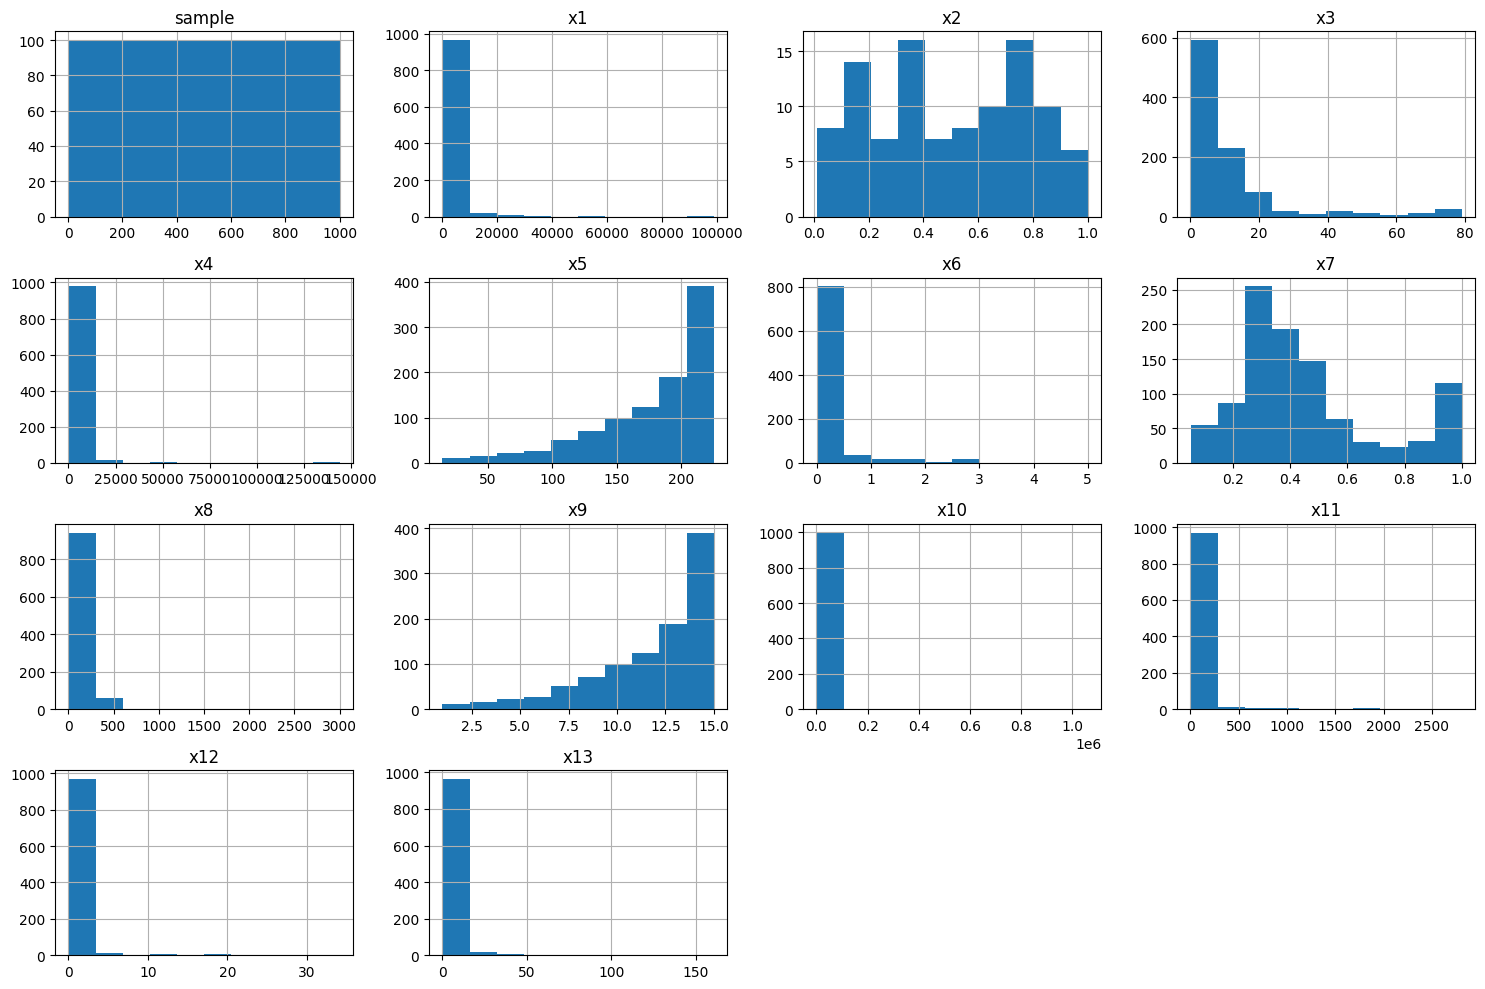

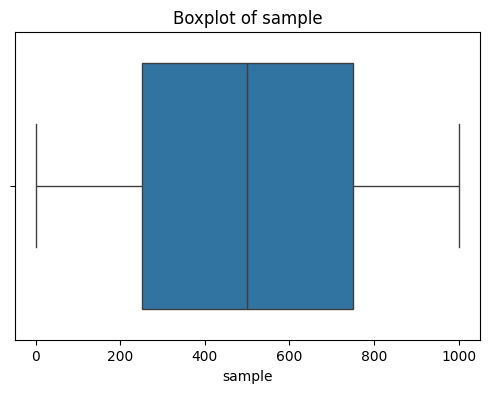

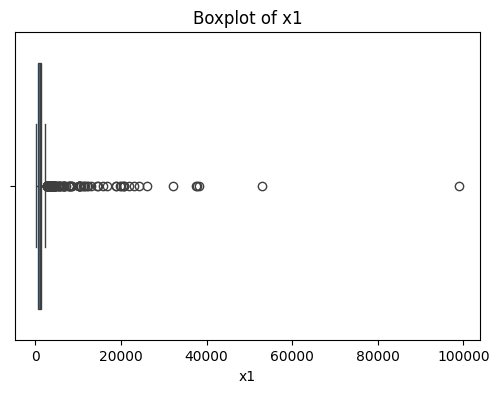

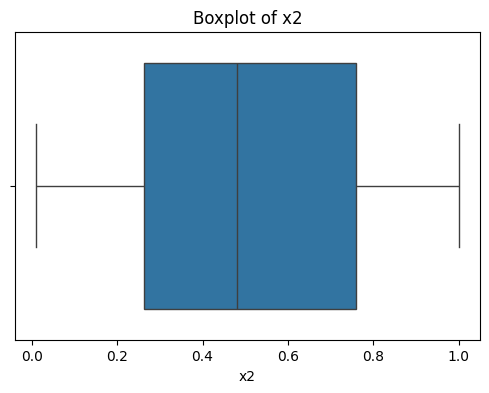

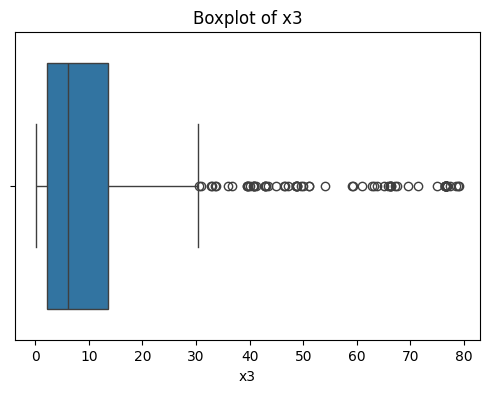

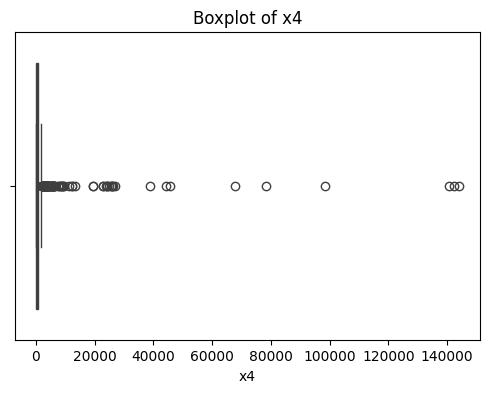

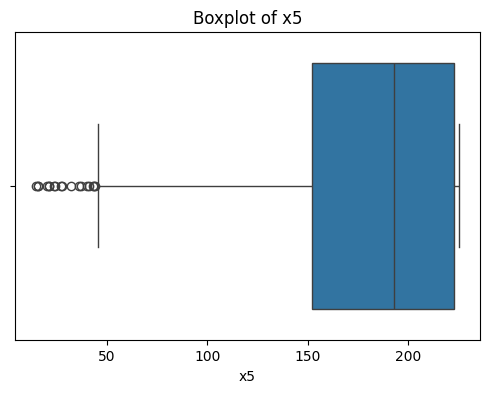

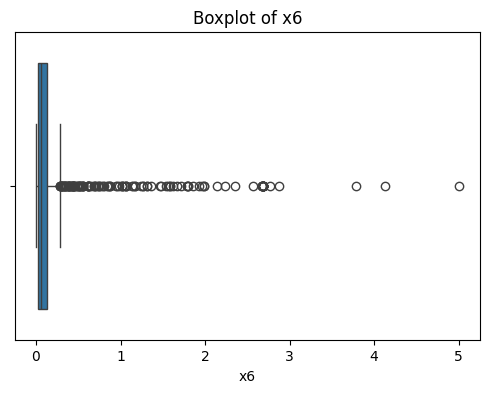

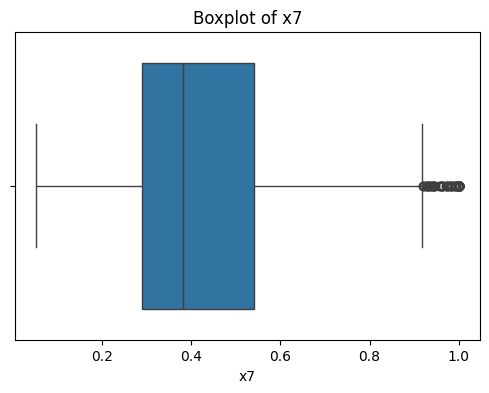

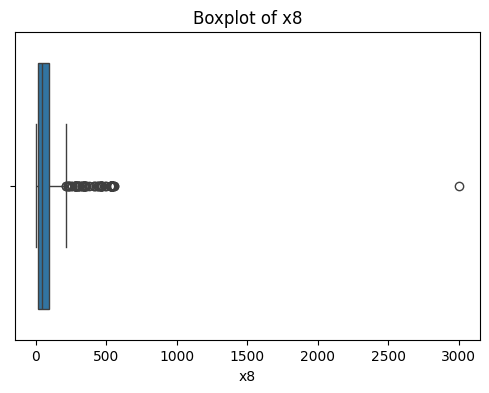

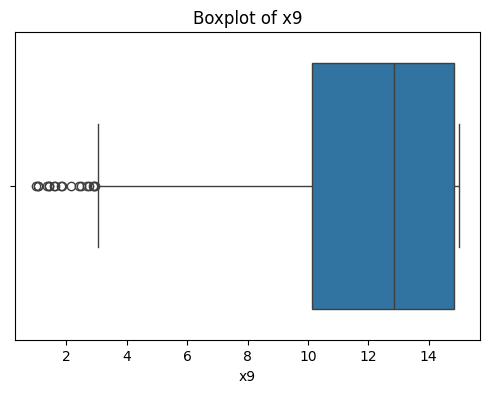

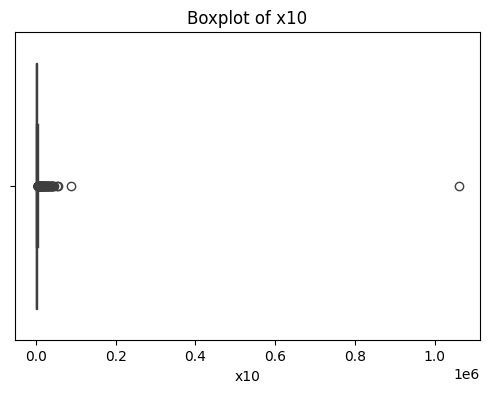

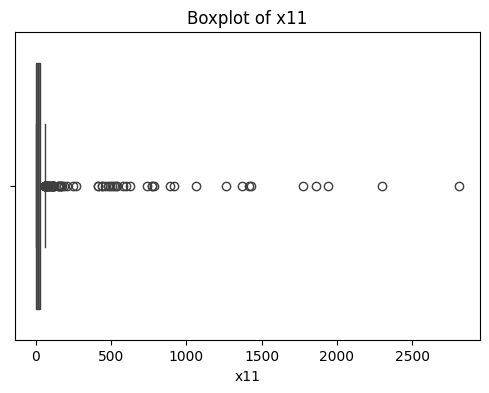

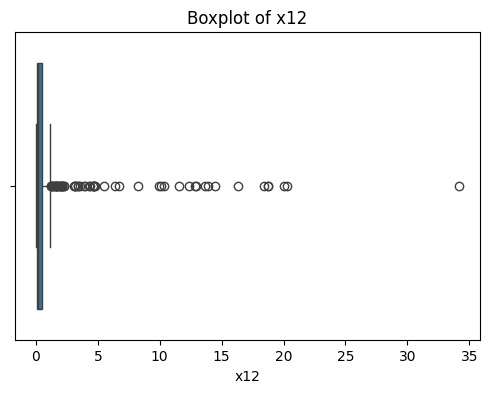

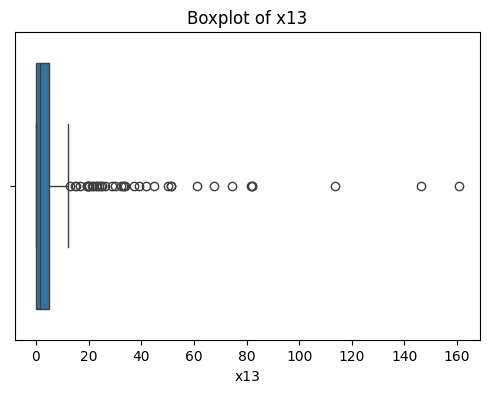

In [4]:
# Separate numerical values
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
# Histograms for numerical features
train_data[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots for numerical features to check for outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\hayde\AppData\Local\Temp\ipykernel_9588\915822487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')


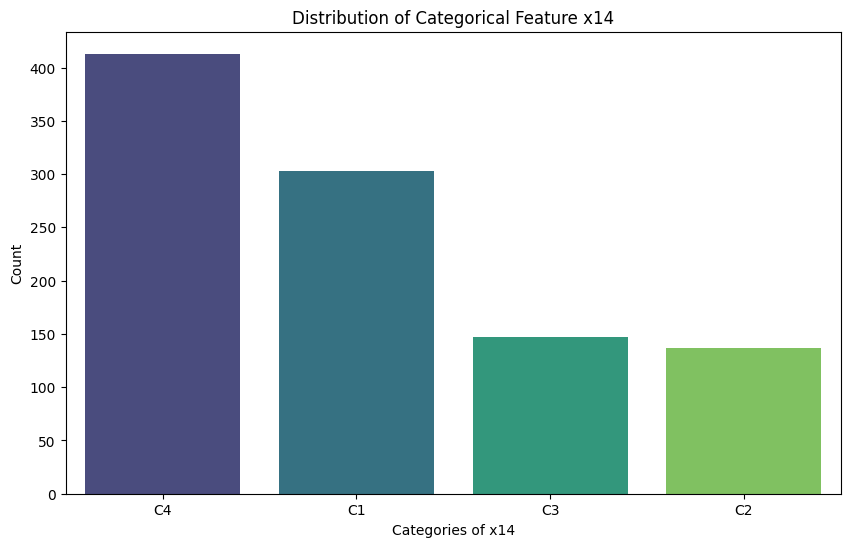


Class distribution in training data:



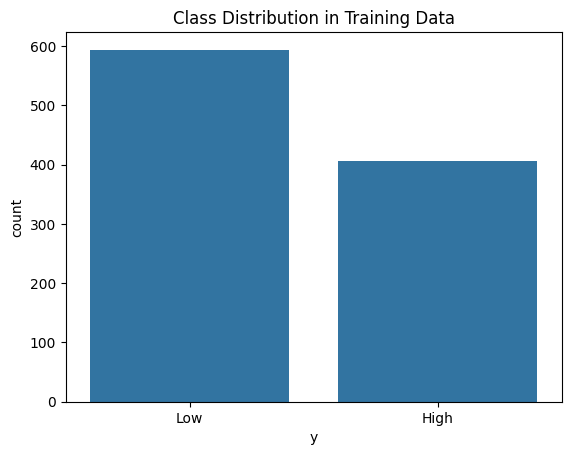

Imbalance ratio: 0.68


In [5]:
# Plot the distribution of the categorical feature x14
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')
plt.title('Distribution of Categorical Feature x14')
plt.xlabel('Categories of x14')
plt.ylabel('Count')
plt.show()

# Visualize class distribution for training data
print("\nClass distribution in training data:\n")
sns.countplot(x='y', data=train_data)
plt.title('Class Distribution in Training Data')
plt.show()

# Class distribution
class_counts = train_data['y'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")


## 2- Feature selection/transformation/engineering

In [6]:
# Initialize label encoder
label_encoder = LabelEncoder()

# One-hot encode the categorical feature x14
encoded_train_data = pd.get_dummies(train_data, columns=['x14'])  # Avoid dummy variable trap
encoded_test_data = pd.get_dummies(test_data, columns=['x14'])

# Encode the target variable
encoded_train_data["y"]=encoded_train_data["y"].map(lambda x: 1 if x=="High" else 0)
encoded_test_data["y"]=encoded_test_data["y"].map(lambda x: 1 if x=="High" else 0)

# Drop the sample column
encoded_train_data = encoded_train_data.drop(columns=['sample'])
encoded_test_data = encoded_test_data.drop(columns=['sample']) 

# Inspect the new columns
print("\nSample of data after transformation:\n",encoded_train_data.head())
print("\ny = low --> 0")
print("y = high --> 1")


Sample of data after transformation:
      x1  x2         x3   x4       x5       x6     x7       x8      x9  \
0  1353 NaN   1.142857   88  104.850  0.00727  0.443    7.997   6.990   
1  1107 NaN   4.857143  306  194.175  0.03778  0.363   34.002  12.945   
2   984 NaN   6.571429  368  208.575  0.05750  0.356   46.000  13.905   
3  1107 NaN   4.714286  297  175.725  0.03667  0.354   33.003  11.715   
4   123 NaN  33.571429  235  225.000  2.35000  0.923  235.000  15.000   

       x10   x11       x12   x13  y  x14_C1  x14_C2  x14_C3  x14_C4  
0  8346.00   3.9  0.032695  0.05  0    True   False   False   False  
1   376.64  11.1  0.210526  3.15  0   False   False    True   False  
2   451.54  13.1  0.271930  3.10  0    True   False   False   False  
3   393.76  10.5  0.185008  2.85  0    True   False   False   False  
4  5805.82  21.7  0.187400  0.40  1   False   False   False    True  

y = low --> 0
y = high --> 1


## 3- Dealing with missing values

In [7]:
missing_train_values = encoded_train_data.isnull().sum()
print(f'percentage of messing values in training set\n{missing_train_values*100/len(encoded_train_data)}')

missing_test_values = encoded_test_data.isnull().sum()
print(f'\npercentage of values messing in testing set\n{missing_test_values*100/len(encoded_test_data)}')



percentage of messing values in training set
x1         0.0
x2        89.8
x3         0.0
x4         0.0
x5         0.0
x6        10.4
x7         0.0
x8         0.0
x9         0.0
x10        0.0
x11        0.0
x12        0.0
x13        0.0
y          0.0
x14_C1     0.0
x14_C2     0.0
x14_C3     0.0
x14_C4     0.0
dtype: float64

percentage of values messing in testing set
x1         0.000000
x2        88.395062
x3         0.000000
x4         0.000000
x5         0.000000
x6         9.135802
x7         0.000000
x8         0.000000
x9         0.000000
x10        0.000000
x11        0.000000
x12        0.000000
x13        0.000000
y          0.000000
x14_C1     0.000000
x14_C2     0.000000
x14_C3     0.000000
x14_C4     0.000000
dtype: float64


In [8]:
# copying the training data to compare it in a graph with the transformed data
original_encoded_train_data = encoded_train_data.copy()

# Dropping feature[x2] and imputing missing values for feature[x6]
encoded_train_data = encoded_train_data.drop(columns=['x2'])
encoded_test_data = encoded_test_data.drop(columns=['x2'])

# Fill missing values in numerical features with the mean
# could consider using "Median" instead of "Mean"
encoded_train_data.fillna(encoded_train_data.mean(), inplace=True)
encoded_test_data.fillna(encoded_test_data.mean(), inplace=True)

missing_train_values = encoded_train_data.isnull().sum()
missing_test_values = encoded_test_data.isnull().sum()

print("\nFeature: x2 has been dropped due to significant percentage of missing values")
print(f"\nmissing training values after imputing:\n{missing_train_values}\n")
print(f"\nmissing testing values after imputing:\n{missing_test_values}\n")


Feature: x2 has been dropped due to significant percentage of missing values

missing training values after imputing:
x1        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
y         0
x14_C1    0
x14_C2    0
x14_C3    0
x14_C4    0
dtype: int64


missing testing values after imputing:
x1        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
y         0
x14_C1    0
x14_C2    0
x14_C3    0
x14_C4    0
dtype: int64



In [9]:
# Identify Skewness on Original Data
numerical_features = encoded_train_data.select_dtypes(include=['float64', 'int64']).columns.drop('y')
skewness = encoded_train_data[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness_threshold = 0.5
skewed_features = skewness[abs(skewness) > skewness_threshold].index
print("Skewed features:\n", skewed_features)

Skewed features:
 Index(['x10', 'x4', 'x1', 'x8', 'x11', 'x13', 'x12', 'x6', 'x3', 'x7', 'x9',
       'x5'],
      dtype='object')


In [10]:
# Apply Transformations to Reduce Skewness
for feature in skewed_features:
    # Shift data if necessary to ensure all values are positive
    min_value = encoded_train_data[feature].min()
    if min_value <= 0:
        encoded_train_data[feature] = encoded_train_data[feature] - min_value + 1
        encoded_test_data[feature] = encoded_test_data[feature] - min_value + 1
    
    # Apply log transformation
    encoded_train_data[feature] = np.log1p(encoded_train_data[feature])
    encoded_test_data[feature] = np.log1p(encoded_test_data[feature])


In [11]:
# Recalculate skewness
skewness_after = encoded_train_data[skewed_features].apply(lambda x: x.skew())
print("Skewness after transformation:\n", skewness_after)


Skewness after transformation:
 x10    1.408119
x4     0.310451
x1     0.128287
x8    -0.293507
x11    0.847231
x13    0.905722
x12    3.777110
x6     3.122638
x3     0.218179
x7     0.697576
x9    -2.321215
x5    -2.659655
dtype: float64


In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
encoded_train_data[skewed_features] = pt.fit_transform(encoded_train_data[skewed_features])
encoded_test_data[skewed_features] = pt.transform(encoded_test_data[skewed_features])


In [13]:
skewness_after = encoded_train_data[skewed_features].apply(lambda x: x.skew())
print("Skewness after the second transformation:\n", skewness_after)


Skewness after the second transformation:
 x10    0.273592
x4    -0.004745
x1     0.026556
x8    -0.052855
x11   -0.012873
x13    0.048967
x12    0.301352
x6     0.541455
x3    -0.050517
x7     0.030242
x9    -0.478334
x5    -0.481416
dtype: float64


In [ ]:
# Scale the data
scaler = StandardScaler()
encoded_train_data_normalized = encoded_train_data.copy()
encoded_test_data_normalized = encoded_test_data.copy()

encoded_train_data_normalized[numerical_features] = scaler.fit_transform(encoded_train_data[numerical_features])
encoded_test_data_normalized[numerical_features] = scaler.transform(encoded_test_data[numerical_features])

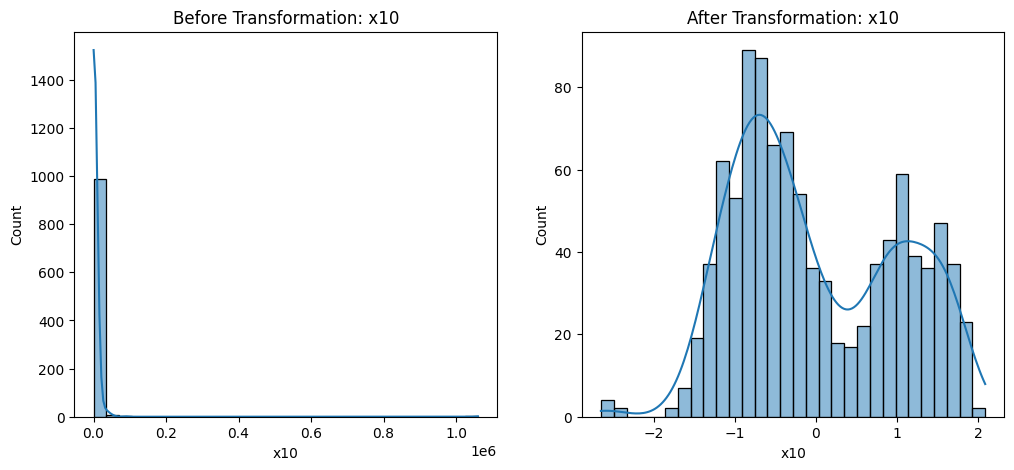

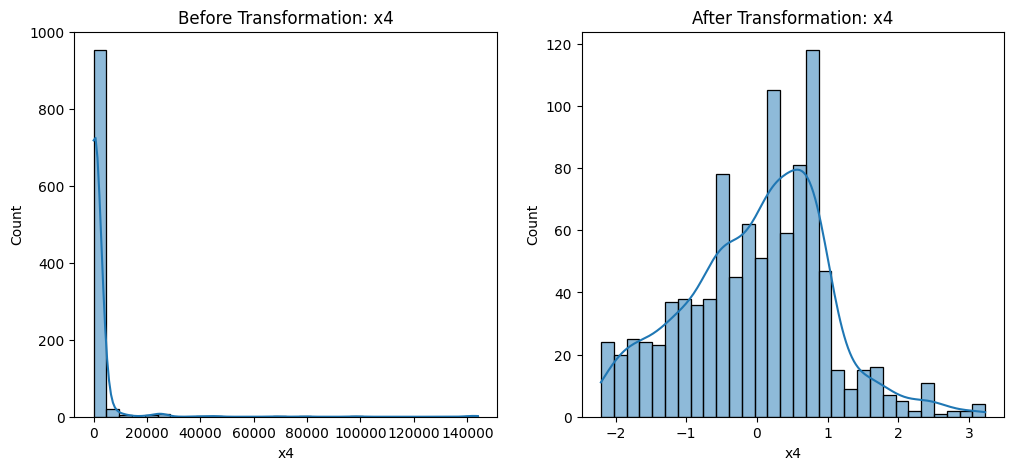

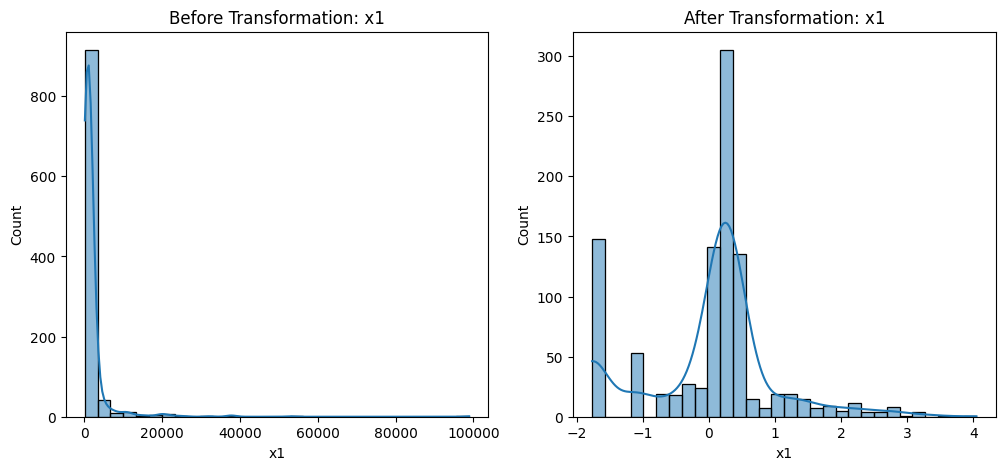

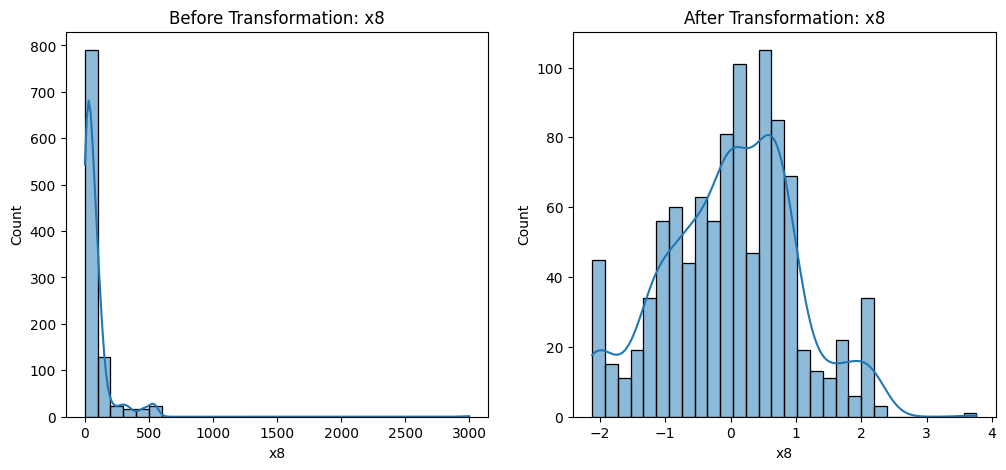

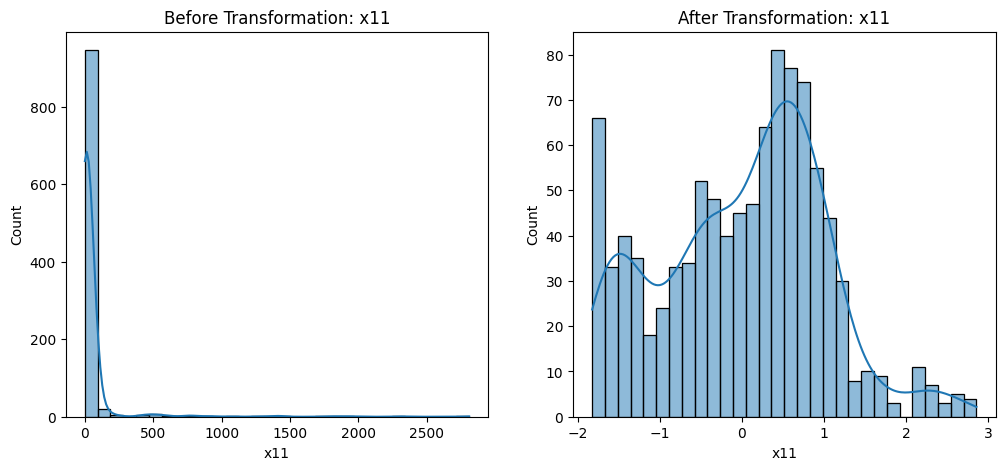

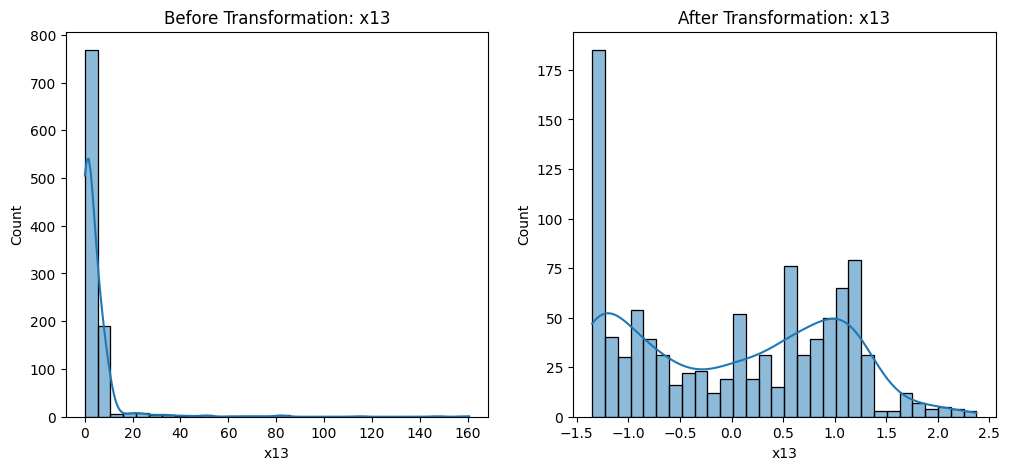

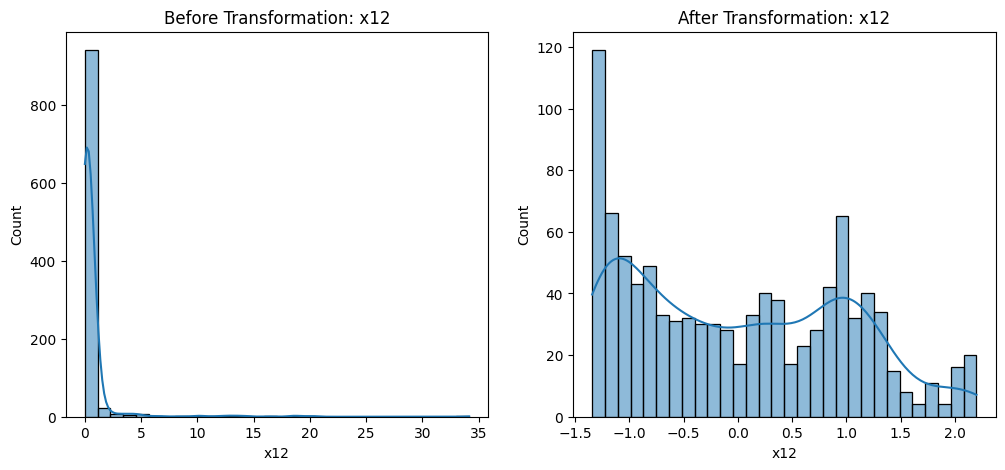

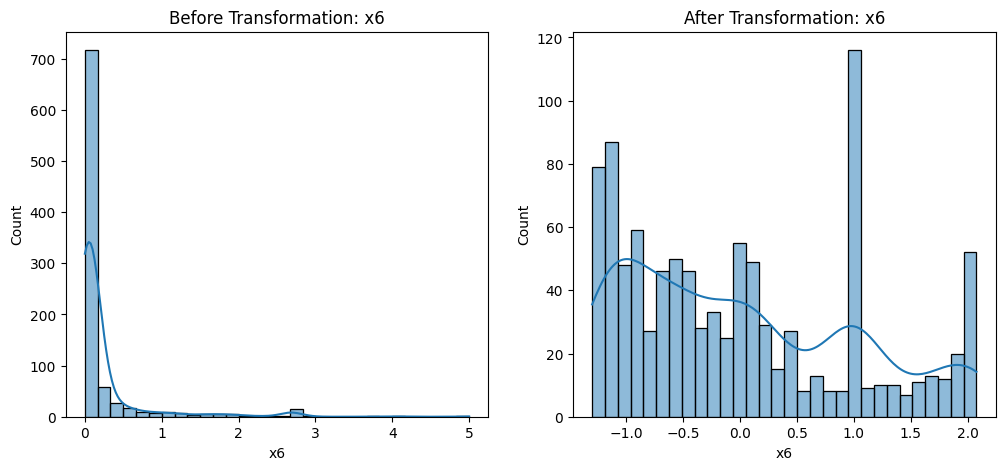

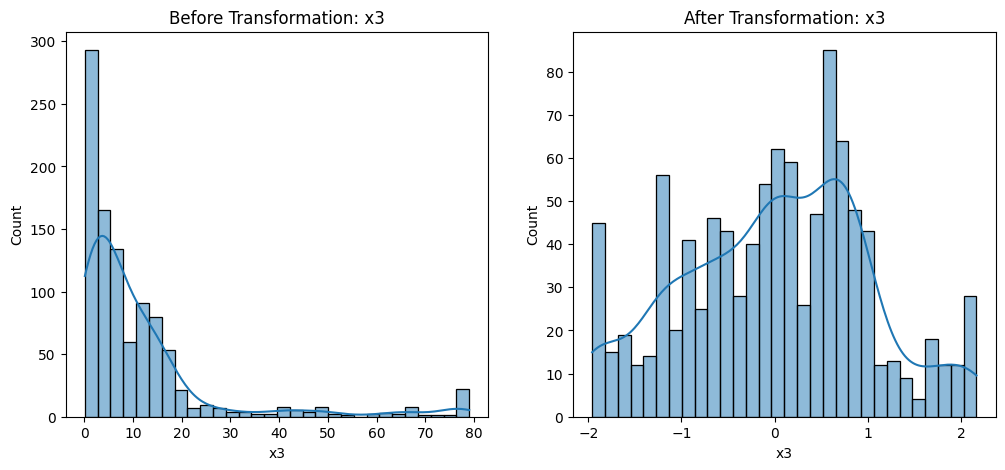

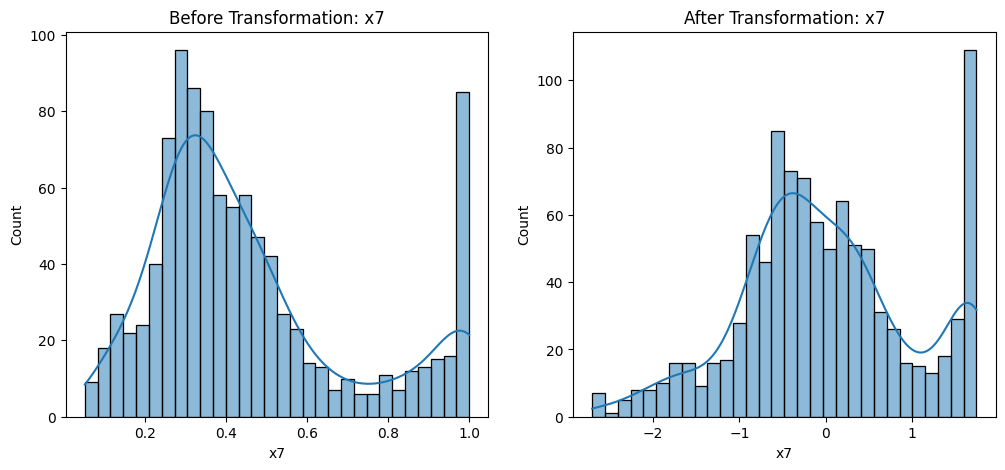

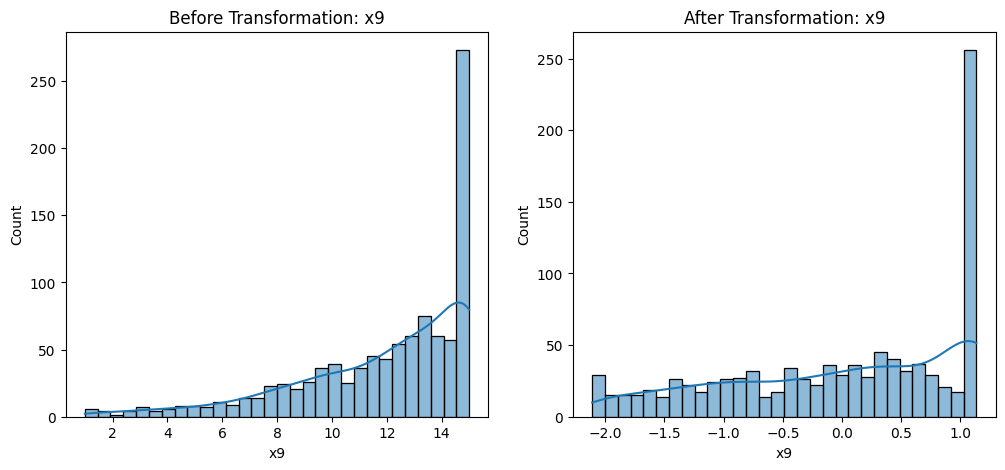

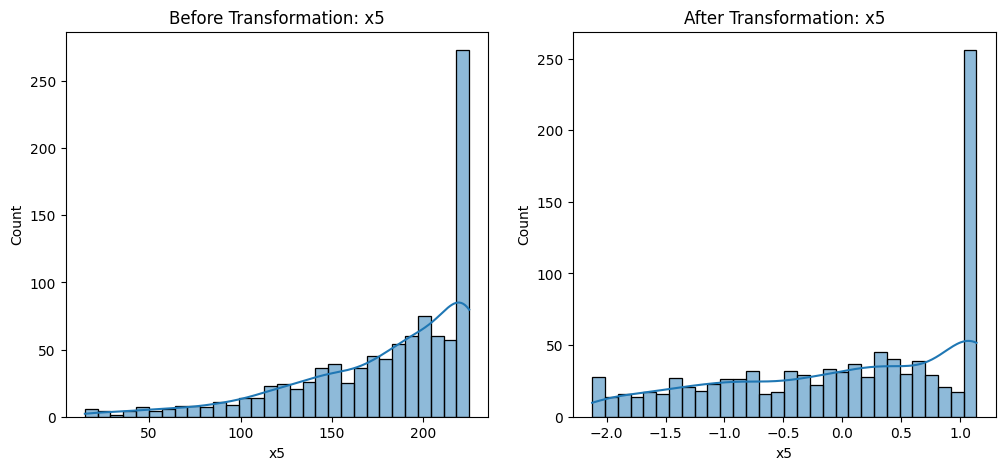

In [15]:
# Plotting before and after transformation
for feature in skewed_features:
    plt.figure(figsize=(12, 5))
    # Before transformation (original data)
    plt.subplot(1, 2, 1)
    sns.histplot(original_encoded_train_data[feature], bins=30, kde=True)
    plt.title(f'Before Transformation: {feature}')
    # After transformation (transformed data before scaling)
    plt.subplot(1, 2, 2)
    sns.histplot(encoded_train_data_normalized[feature], bins=30, kde=True)
    plt.title(f'After Transformation: {feature}')
    plt.show()


Now that data has been transformed, we can use {Pearson} correlation to identify highly correlated features



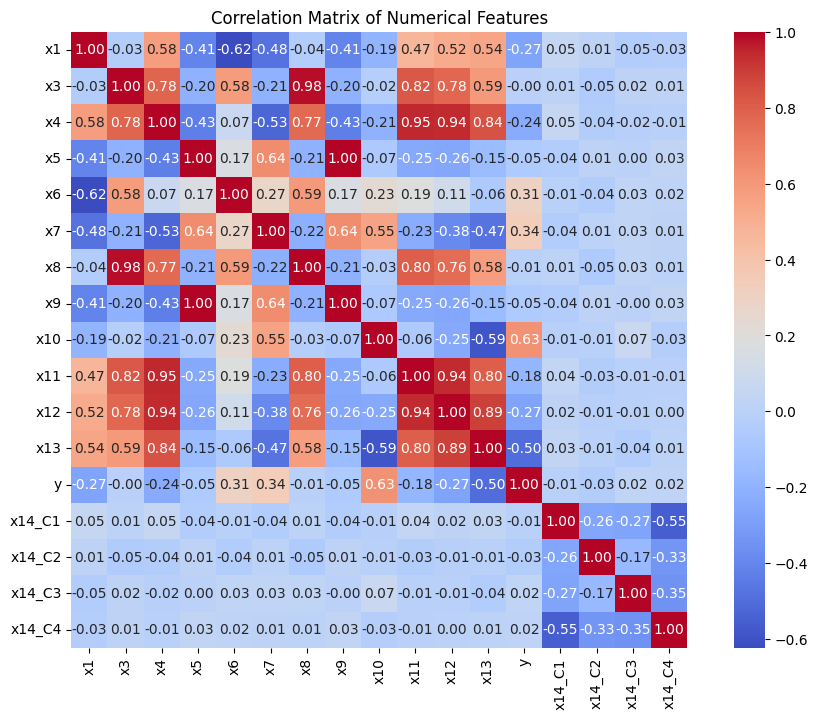

Correlation of features with encoded target variable:
 x10       0.625137
x7        0.339137
x6        0.306642
x14_C3    0.024831
x14_C4    0.017875
x3       -0.001530
x8       -0.011964
x14_C1   -0.013373
x14_C2   -0.033294
x9       -0.054597
x5       -0.054889
x11      -0.180084
x4       -0.239704
x1       -0.267914
x12      -0.273132
x13      -0.499014
Name: y, dtype: float64

Features with co-correlation value >= 0.9:


,Feature 1,Feature 2,High Correlation,Correlation Value
23,x3,x8,True,0.984128
43,x4,x11,True,0.947023
44,x4,x12,True,0.941310
58,x5,x9,True,0.999998
103,x8,x3,True,0.984128
122,x9,x5,True,0.999998
155,x11,x4,True,0.947023
163,x11,x12,True,0.942347
172,x12,x4,True,0.941310
179,x12,x11,True,0.942347


In [16]:
# Correlation matrix for numerical features, including the encoded target

print("Now that data has been transformed, we can use {Pearson} correlation to identify highly correlated features\n")

plt.figure(figsize=(12, 8))
correlation_matrix = encoded_train_data_normalized.corr(method='pearson')  # This will now include 'y_encoded'
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation with the encoded target variable
correlation_with_target = correlation_matrix['y'].drop('y')  # Exclude the encoded target itself
print("Correlation of features with encoded target variable:\n",correlation_with_target.sort_values(ascending=False))

# Identify highly correlated features 
high_correlations = correlation_matrix.abs() > 0.89 

# Convert the Series to a DataFrame for better readability 
high_correlations_df = high_correlations.unstack().reset_index() 
high_correlations_df.columns = ['Feature 1', 'Feature 2', 'High Correlation'] 

# Filter only the highly correlated pairs and add the actual correlation values 
high_correlations_df = high_correlations_df[high_correlations_df['High Correlation'] & (high_correlations_df['Feature 1'] != high_correlations_df['Feature 2'])] 
high_correlations_df['Correlation Value'] = high_correlations_df.apply(lambda row: correlation_matrix.loc[row['Feature 1'], row['Feature 2']], axis=1) 

# Print the DataFrame using tabulate 
print("\nFeatures with co-correlation value >= 0.9:")
display(high_correlations_df)

Features with absolute correlation value > 0.2 with the target variable:
 x10    0.625137
x7     0.339137
x6     0.306642
x4    -0.239704
x1    -0.267914
x12   -0.273132
x13   -0.499014
Name: y, dtype: float64


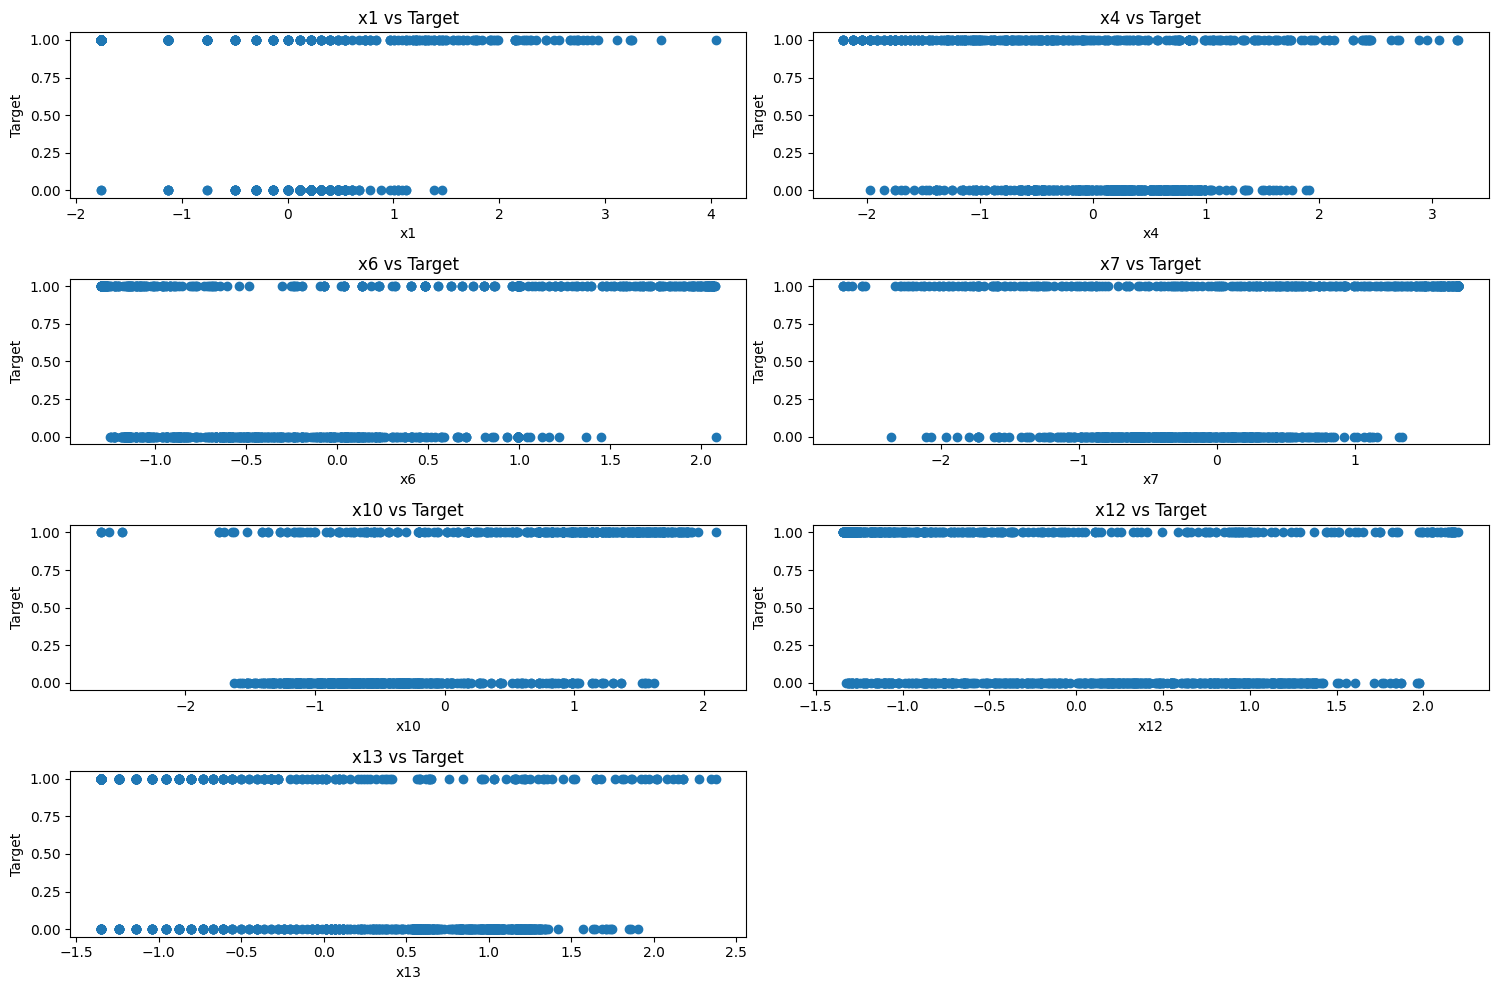

In [17]:
# Select features with correlation above a threshold
high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.2]
print("Features with absolute correlation value > 0.2 with the target variable:\n",high_corr_features.sort_values(ascending=False))

# Scatter plots for top correlated features
top_features = high_corr_features.index.tolist()
plt.figure(figsize=(15,10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 2, i)
    plt.scatter(encoded_train_data_normalized[feature], encoded_train_data_normalized['y'])
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

In [18]:
# Initialize a set to keep track of features to drop
features_to_drop = set()

# Group features by their correlation
correlation_groups = {}

# Build groups of highly correlated features
for _, row in high_correlations_df.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        if feature1 not in correlation_groups:
            correlation_groups[feature1] = {feature1}  # Initialize the group
        correlation_groups[feature1].add(feature2)  # Add feature2 to the group
        correlation_groups[feature2] = correlation_groups[feature1]  # Link both features

# Now evaluate each group to decide which feature to keep
for group in correlation_groups.values():
    if len(group) > 1:
        # Get the feature with the highest absolute correlation with the target
        best_feature = max(group, key=lambda f: abs(correlation_with_target[f]) if f in correlation_with_target.index else 0)
        # Mark the other features for dropping
        features_to_drop.update(group - {best_feature})

# Drop the identified features from the dataset
encoded_train_data_reduced = encoded_train_data_normalized.drop(columns=features_to_drop, errors='ignore')
encoded_test_data_reduced = encoded_test_data_normalized.drop(columns=features_to_drop, errors='ignore')

# Print the features that were dropped
print("Dropped Features:\n", features_to_drop)
print("Kept Features:\n", encoded_train_data_reduced.columns.tolist())


Dropped Features:
 {'x12', 'x9', 'x3', 'x11', 'x4'}
Kept Features:
 ['x1', 'x5', 'x6', 'x7', 'x8', 'x10', 'x13', 'y', 'x14_C1', 'x14_C2', 'x14_C3', 'x14_C4']


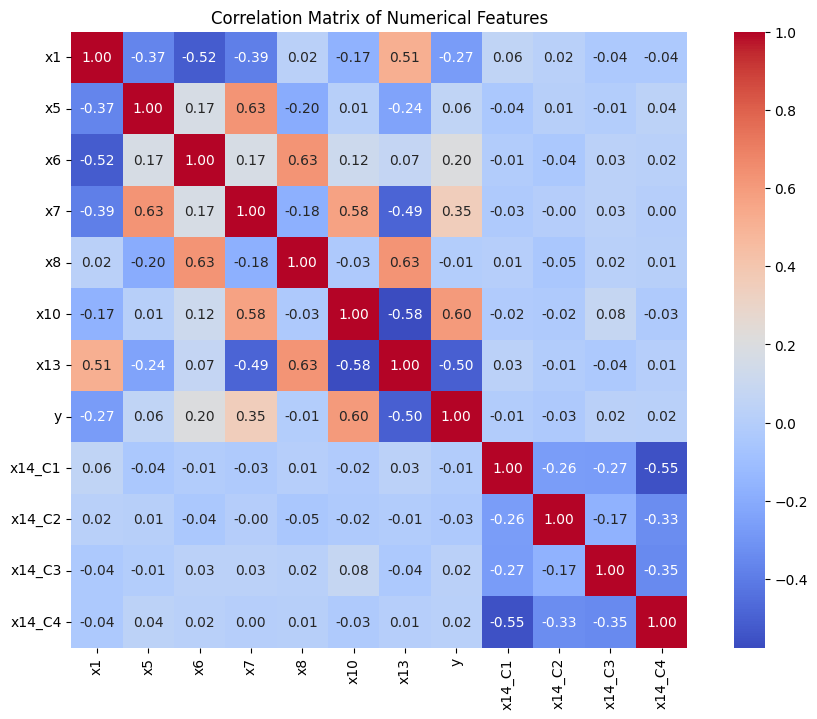

In [19]:
# Correlation matrix for numerical features, including the encoded target
plt.figure(figsize=(12, 8))
correlation_matrix = encoded_train_data_reduced.corr(method='spearman')  # This will now include 'y_encoded'
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 4- Dealing with imbalanced data

In [20]:
# Separate features and target variable
X = encoded_train_data_reduced.drop('y', axis=1)
y = encoded_train_data_reduced['y']

# Split into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_test = encoded_test_data_reduced.drop('y', axis=1)
y_test = encoded_test_data_reduced['y']

print("Class distribution in y_train:\n", y_train.value_counts())
print("\nClass distribution in y_val:\n", y_val.value_counts())

Class distribution in y_train:
 y
0    475
1    325
Name: count, dtype: int64

Class distribution in y_val:
 y
0    119
1     81
Name: count, dtype: int64


In [21]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Class distribution after Random Oversampling:\n", y_train_ros.value_counts())


Class distribution after Random Oversampling:
 y
0    475
1    475
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_smote.value_counts())


Class distribution after SMOTE:
 y
0    475
1    475
Name: count, dtype: int64


In [23]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Class distribution after Random Undersampling:\n", y_train_rus.value_counts())


Class distribution after Random Undersampling:
 y
0    325
1    325
Name: count, dtype: int64


In [24]:
# Dictionaries to store different versions of the training data

training_sets = {
    'Original': (X_train, y_train),
    'Random Oversampling': (X_train_ros, y_train_ros),
    'SMOTE': (X_train_smote, y_train_smote),
    'Random Undersampling': (X_train_rus, y_train_rus)
}



## 5- Four Classifiers

In [47]:
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Sensitivity and Specificity
    sensitivity = recall_score(y_val, y_pred)
    specificity = tn / (tn + fp)
    
    # G-Mean
    gmean = geometric_mean_score(y_val, y_pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_val, y_proba)
    
    print(f"\nSensitivity (Recall for Positive Class): {sensitivity:.4f}")
    print(f"Specificity (Recall for Negative Class): {specificity:.4f}")
    print(f"\nG-Mean: {gmean:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    return {'sensitivity': sensitivity, 'specificity': specificity, 'gmean': gmean, 'roc_auc': roc_auc}


In [48]:
# Create a dictionary to store trained models
trained_models = {}

#### 5.1 Linear Classifier: (LR)

In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train on Original Data
print("Logistic Regression on Original Data")
lr.fit(X_train, y_train)
print("Validation Set Performance:")
lr_original_results = evaluate_model(lr, X_val, y_val)
trained_models[('Logistic Regression', 'Original')] = lr



Logistic Regression on Original Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.6914
Specificity (Recall for Negative Class): 0.9076

G-Mean: 0.7921
ROC-AUC: 0.8818


In [50]:
# Train on Random Oversampling Data
print("Logistic Regression on Random Oversampled Data")
lr.fit(X_train_ros, y_train_ros)
print("Validation Set Performance:")
lr_ros_results = evaluate_model(lr, X_val, y_val)
trained_models[('Logistic Regression', 'Random Oversampling')] = lr



Logistic Regression on Random Oversampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.7654
Specificity (Recall for Negative Class): 0.8487

G-Mean: 0.8060
ROC-AUC: 0.8875


In [51]:
# Train on SMOTE Data
print("Logistic Regression on SMOTE Data")
lr.fit(X_train_smote, y_train_smote)
print("Validation Set Performance:")
lr_smote_results = evaluate_model(lr, X_val, y_val)
trained_models[('Logistic Regression', 'SMOTE')] = lr


Logistic Regression on SMOTE Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.7284
Specificity (Recall for Negative Class): 0.8739

G-Mean: 0.7979
ROC-AUC: 0.8839


In [52]:
# Train on Random Undersampling Data
print("Logistic Regression on Random Undersampled Data")
lr.fit(X_train_rus, y_train_rus)
print("Validation Set Performance:")
lr_rus_results = evaluate_model(lr, X_val, y_val)
trained_models[('Logistic Regression', 'Random Undersampling')] = lr



Logistic Regression on Random Undersampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.7531
Specificity (Recall for Negative Class): 0.8739

G-Mean: 0.8113
ROC-AUC: 0.8886


#### 5.2 (DT)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Train on Original Data
print("Decision Tree on Original Data")
dt.fit(X_train, y_train)
print("Validation Set Performance:")
dt_original_results = evaluate_model(dt, X_val, y_val)
trained_models[('Decision Tree', 'Original')] = dt



Decision Tree on Original Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8765
Specificity (Recall for Negative Class): 0.9664

G-Mean: 0.9204
ROC-AUC: 0.9215


In [54]:
# Train on Random Oversampling Data
print("Decision Tree on Random Oversampled Data")
dt.fit(X_train_ros, y_train_ros)
print("Validation Set Performance:")
dt_ros_results = evaluate_model(dt, X_val, y_val)
trained_models[('Decision Tree', 'Random Oversampling')] = dt


Decision Tree on Random Oversampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8395
Specificity (Recall for Negative Class): 0.9580

G-Mean: 0.8968
ROC-AUC: 0.8987


In [55]:
# Train on SMOTE Data
print("Decision Tree on SMOTE Data")
dt.fit(X_train_smote, y_train_smote)
print("Validation Set Performance:")
dt_smote_results = evaluate_model(dt, X_val, y_val)
trained_models[('Decision Tree', 'SMOTE')] = dt


Decision Tree on SMOTE Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8395
Specificity (Recall for Negative Class): 0.9496

G-Mean: 0.8928
ROC-AUC: 0.8945


In [56]:
# Train on Random Undersampling Data
print("Decision Tree on Random Undersampled Data")
dt.fit(X_train_rus, y_train_rus)
print("Validation Set Performance:")
dt_rus_results = evaluate_model(dt, X_val, y_val)
trained_models[('Decision Tree', 'Random Undersampling')] = dt


Decision Tree on Random Undersampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8519
Specificity (Recall for Negative Class): 0.9580

G-Mean: 0.9034
ROC-AUC: 0.9049


#### 5.3 (NN)

In [57]:
from sklearn.neural_network import MLPClassifier

# Initialize the classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Train on Original Data
print("Neural Network on Original Data")
mlp.fit(X_train, y_train)
print("Validation Set Performance:")
mlp_original_results = evaluate_model(mlp, X_val, y_val)
trained_models[('Neural Network', 'Original')] = mlp



Neural Network on Original Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8642
Specificity (Recall for Negative Class): 0.9496

G-Mean: 0.9059
ROC-AUC: 0.9657


In [58]:
# Train on Random Oversampling Data
print("Neural Network on Random Oversampled Data")
mlp.fit(X_train_ros, y_train_ros)
print("Validation Set Performance:")
mlp_ros_results = evaluate_model(mlp, X_val, y_val)
trained_models[('Neural Network', 'Random Oversampling')] = mlp


Neural Network on Random Oversampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8642
Specificity (Recall for Negative Class): 0.9496

G-Mean: 0.9059
ROC-AUC: 0.9668


In [59]:
# Train on SMOTE Data
print("Neural Network on SMOTE Data")
mlp.fit(X_train_smote, y_train_smote)
print("Validation Set Performance:")
mlp_smote_results = evaluate_model(mlp, X_val, y_val)
trained_models[('Neural Network', 'SMOTE')] = mlp


Neural Network on SMOTE Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8765
Specificity (Recall for Negative Class): 0.9412

G-Mean: 0.9083
ROC-AUC: 0.9583


In [60]:
# Train on Random Undersampling Data
print("Neural Network on Random Undersampled Data")
mlp.fit(X_train_rus, y_train_rus)
print("Validation Set Performance:")
mlp_rus_results = evaluate_model(mlp, X_val, y_val)
trained_models[('Neural Network', 'Random Undersampling')] = mlp


Neural Network on Random Undersampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8519
Specificity (Recall for Negative Class): 0.9580

G-Mean: 0.9034
ROC-AUC: 0.9604


#### 5.4 Ensemble Learning (RF)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Train on Original Data
print("Random Forest on Original Data")
rf.fit(X_train, y_train)
print("Validation Set Performance:")
rf_original_results = evaluate_model(rf, X_val, y_val)
trained_models[('Random Forest', 'Original')] = rf


Random Forest on Original Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8765
Specificity (Recall for Negative Class): 0.9496

G-Mean: 0.9123
ROC-AUC: 0.9777


In [62]:
# Train on Random Oversampling Data
print("Random Forest on Random Oversampled Data")
rf.fit(X_train_ros, y_train_ros)
print("Validation Set Performance:")
rf_ros_results = evaluate_model(rf, X_val, y_val)
trained_models[('Random Forest', 'Random Oversampling')] = rf


Random Forest on Random Oversampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8889
Specificity (Recall for Negative Class): 0.9412

G-Mean: 0.9147
ROC-AUC: 0.9760


In [63]:
# Train on SMOTE Data
print("Random Forest on SMOTE Data")
rf.fit(X_train_smote, y_train_smote)
print("Validation Set Performance:")
rf_smote_results = evaluate_model(rf, X_val, y_val)
trained_models[('Random Forest', 'SMOTE')] = rf


Random Forest on SMOTE Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8765
Specificity (Recall for Negative Class): 0.9328

G-Mean: 0.9042
ROC-AUC: 0.9747


In [64]:
# Train on Random Undersampling Data
print("Random Forest on Random Undersampled Data")
rf.fit(X_train_rus, y_train_rus)
print("Validation Set Performance:")
rf_rus_results = evaluate_model(rf, X_val, y_val)
trained_models[('Random Forest', 'Random Undersampling')] = rf


Random Forest on Random Undersampled Data
Validation Set Performance:

Sensitivity (Recall for Positive Class): 0.8765
Specificity (Recall for Negative Class): 0.9244

G-Mean: 0.9001
ROC-AUC: 0.9757


#### Comparing the results

In [65]:
# Collect results into a DataFrame
results_df = pd.DataFrame([
    {'Classifier': 'Logistic Regression', 'Dataset': 'Original', **lr_original_results},
    {'Classifier': 'Logistic Regression', 'Dataset': 'Random Oversampling', **lr_ros_results},
    {'Classifier': 'Logistic Regression', 'Dataset': 'SMOTE', **lr_smote_results},
    {'Classifier': 'Logistic Regression', 'Dataset': 'Random Undersampling', **lr_rus_results},
    {'Classifier': 'Decision Tree', 'Dataset': 'Original', **dt_original_results},
    {'Classifier': 'Decision Tree', 'Dataset': 'Random Oversampling', **dt_ros_results},
    {'Classifier': 'Decision Tree', 'Dataset': 'SMOTE', **dt_smote_results},
    {'Classifier': 'Decision Tree', 'Dataset': 'Random Undersampling', **dt_rus_results},
    {'Classifier': 'Neural Network', 'Dataset': 'Original', **mlp_original_results},
    {'Classifier': 'Neural Network', 'Dataset': 'Random Oversampling', **mlp_ros_results},
    {'Classifier': 'Neural Network', 'Dataset': 'SMOTE', **mlp_smote_results},
    {'Classifier': 'Neural Network', 'Dataset': 'Random Undersampling', **mlp_rus_results},
    {'Classifier': 'Random Forest', 'Dataset': 'Original', **rf_original_results},
    {'Classifier': 'Random Forest', 'Dataset': 'Random Oversampling', **rf_ros_results},
    {'Classifier': 'Random Forest', 'Dataset': 'SMOTE', **rf_smote_results},
    {'Classifier': 'Random Forest', 'Dataset': 'Random Undersampling', **rf_rus_results}
])

print("\nSummary of Results:")
display(results_df)



Summary of Results:


,Classifier,Dataset,sensitivity,specificity,gmean,roc_auc
0,Logistic Regression,Original,0.691358,0.907563,0.792118,0.881834
1,Logistic Regression,Random Oversampling,0.765432,0.848739,0.806010,0.887540
2,Logistic Regression,SMOTE,0.728395,0.873950,0.797860,0.883909
3,Logistic Regression,Random Undersampling,0.753086,0.873950,0.811270,0.888578
4,Decision Tree,Original,0.876543,0.966387,0.920369,0.921465
5,Decision Tree,Random Oversampling,0.839506,0.957983,0.896790,0.898745
6,Decision Tree,SMOTE,0.839506,0.949580,0.892848,0.894543
7,Decision Tree,Random Undersampling,0.851852,0.957983,0.903360,0.904918
8,Neural Network,Original,0.864198,0.949580,0.905883,0.965660
9,Neural Network,Random Oversampling,0.864198,0.949580,0.905883,0.966802


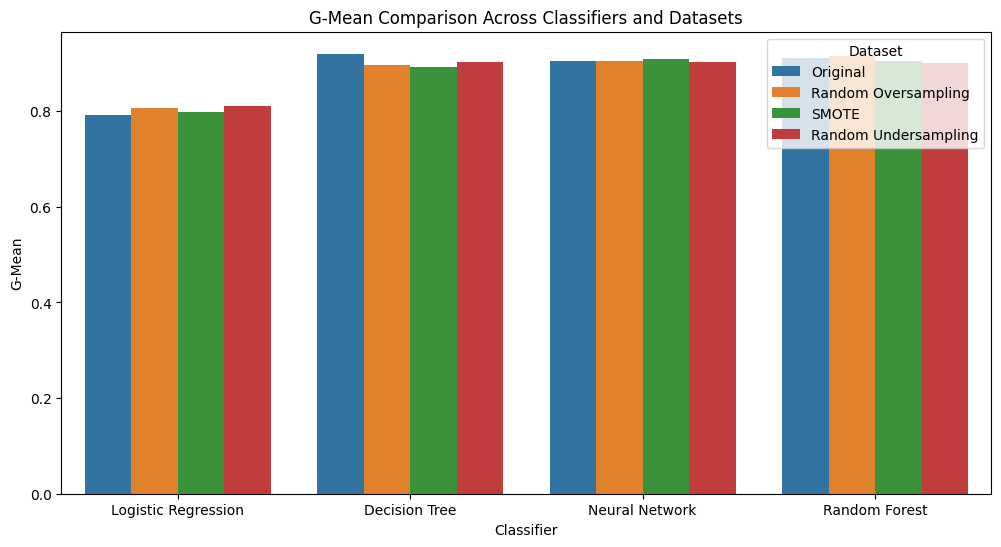

In [66]:
# Visualize G-Mean Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Classifier', y='gmean', hue='Dataset')
plt.title('G-Mean Comparison Across Classifiers and Datasets')
plt.ylabel('G-Mean')
plt.show()


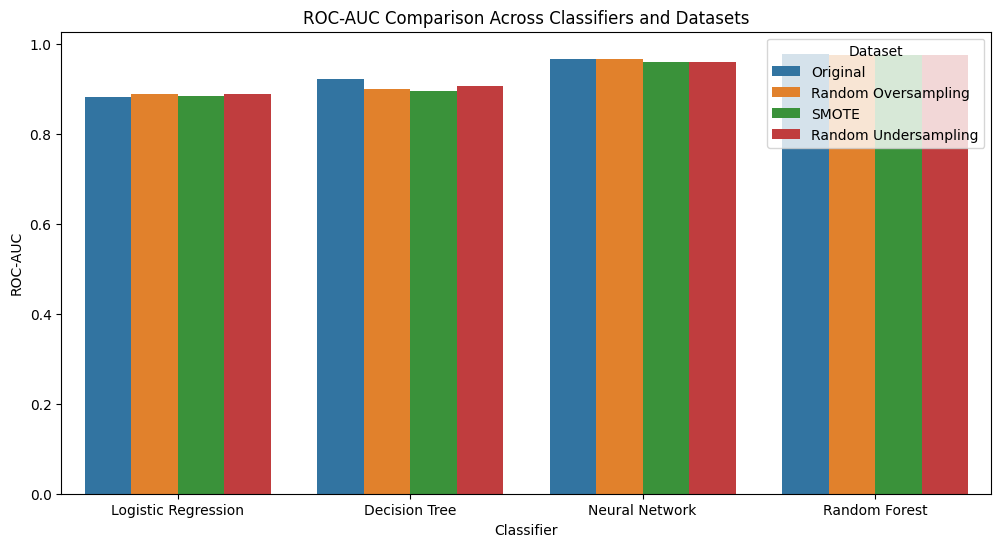

In [67]:
# Visualize ROC-AUC Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Classifier', y='roc_auc', hue='Dataset')
plt.title('ROC-AUC Comparison Across Classifiers and Datasets')
plt.ylabel('ROC-AUC')
plt.show()


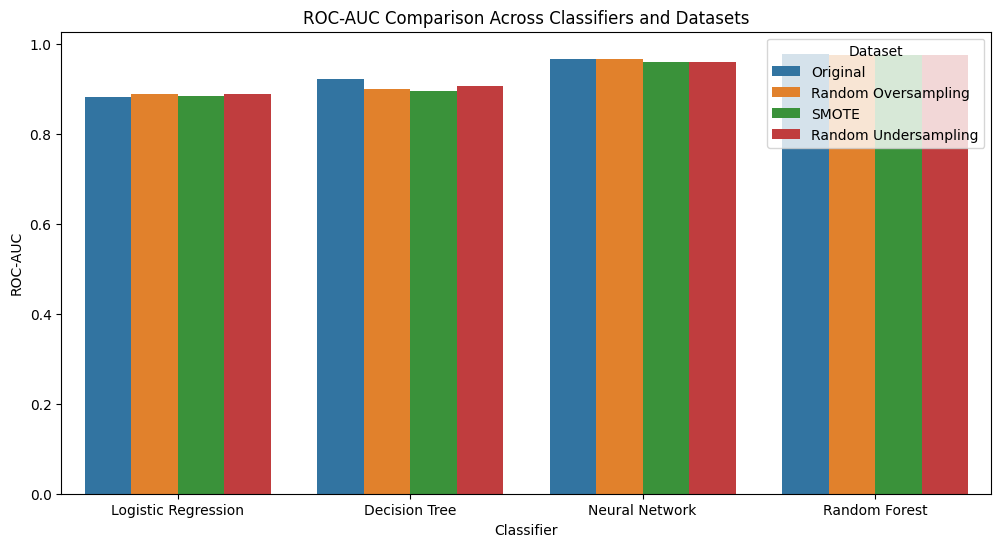

In [68]:
# Visualize ROC-AUC Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Classifier', y='roc_auc', hue='Dataset')
plt.title('ROC-AUC Comparison Across Classifiers and Datasets')
plt.ylabel('ROC-AUC')
plt.show()


## 6- Error analysis and possible improvements

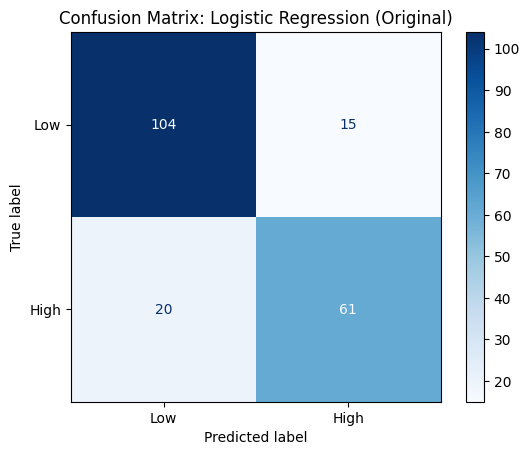


Logistic Regression (Original) - Misclassified Instances: 35


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
827,2.718968,0.429399,-1.103391,0.515786,1.132307,0.866762,2.175010,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
842,0.117583,-0.866481,-0.963163,-1.066259,-0.758566,0.043462,-0.802040,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
109,0.117583,-0.933335,-1.148947,0.427435,-1.300999,0.831539,-1.134772,False,True,False,False,0,1
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0


------------------------------------------------------------


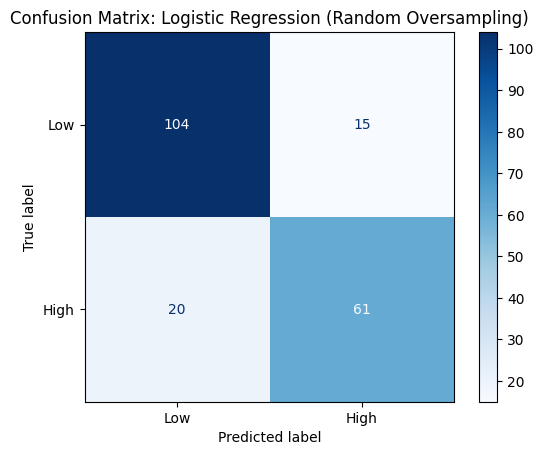


Logistic Regression (Random Oversampling) - Misclassified Instances: 35


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
827,2.718968,0.429399,-1.103391,0.515786,1.132307,0.866762,2.175010,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
842,0.117583,-0.866481,-0.963163,-1.066259,-0.758566,0.043462,-0.802040,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
109,0.117583,-0.933335,-1.148947,0.427435,-1.300999,0.831539,-1.134772,False,True,False,False,0,1
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0


------------------------------------------------------------


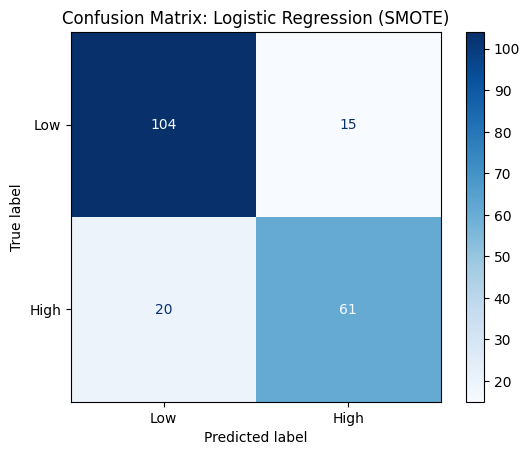


Logistic Regression (SMOTE) - Misclassified Instances: 35


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
827,2.718968,0.429399,-1.103391,0.515786,1.132307,0.866762,2.175010,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
842,0.117583,-0.866481,-0.963163,-1.066259,-0.758566,0.043462,-0.802040,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
109,0.117583,-0.933335,-1.148947,0.427435,-1.300999,0.831539,-1.134772,False,True,False,False,0,1
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0


------------------------------------------------------------


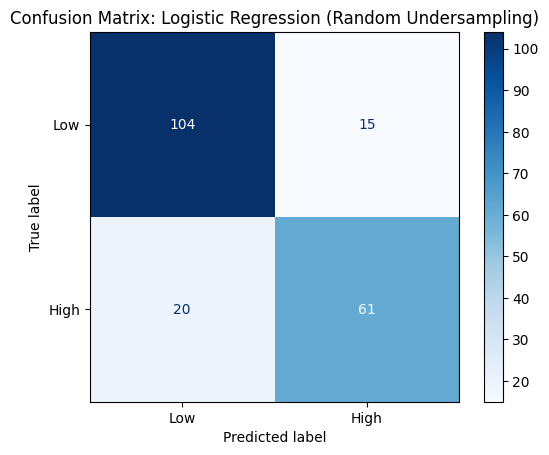


Logistic Regression (Random Undersampling) - Misclassified Instances: 35


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
827,2.718968,0.429399,-1.103391,0.515786,1.132307,0.866762,2.175010,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
842,0.117583,-0.866481,-0.963163,-1.066259,-0.758566,0.043462,-0.802040,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
109,0.117583,-0.933335,-1.148947,0.427435,-1.300999,0.831539,-1.134772,False,True,False,False,0,1
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0


------------------------------------------------------------


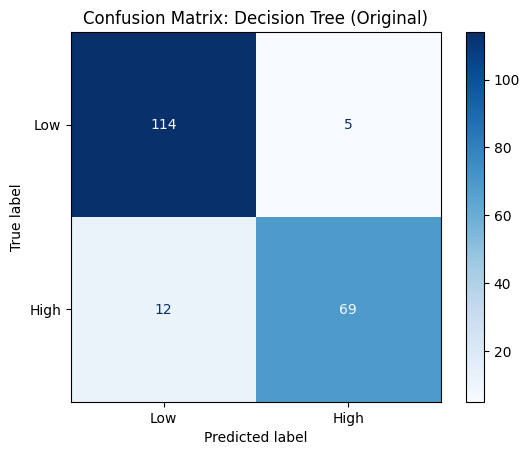


Decision Tree (Original) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0
563,0.878413,-2.118187,1.044512,-2.362460,2.030140,1.525567,-0.133247,True,False,False,False,0,1
498,0.315075,0.371675,0.990677,0.701842,-1.126142,0.929521,-0.954914,False,False,False,True,0,1


------------------------------------------------------------


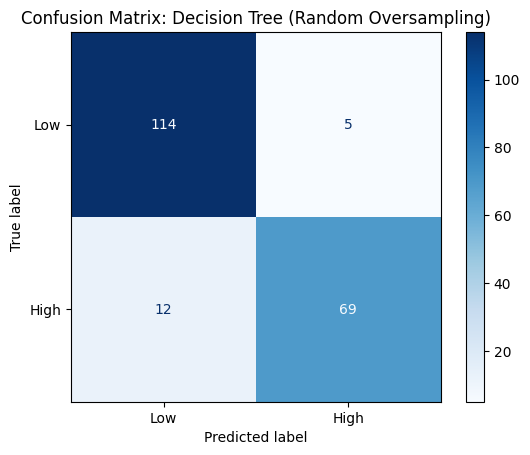


Decision Tree (Random Oversampling) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0
563,0.878413,-2.118187,1.044512,-2.362460,2.030140,1.525567,-0.133247,True,False,False,False,0,1
498,0.315075,0.371675,0.990677,0.701842,-1.126142,0.929521,-0.954914,False,False,False,True,0,1


------------------------------------------------------------


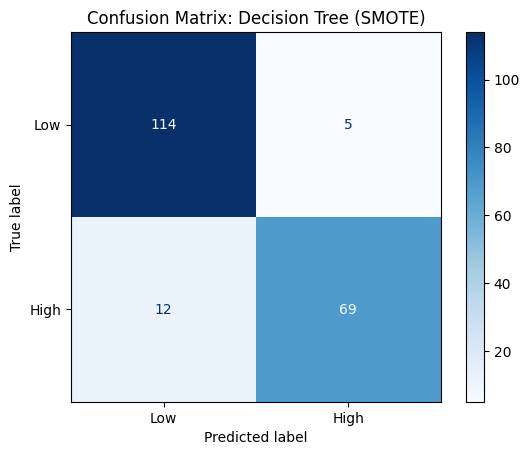


Decision Tree (SMOTE) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0
563,0.878413,-2.118187,1.044512,-2.362460,2.030140,1.525567,-0.133247,True,False,False,False,0,1
498,0.315075,0.371675,0.990677,0.701842,-1.126142,0.929521,-0.954914,False,False,False,True,0,1


------------------------------------------------------------


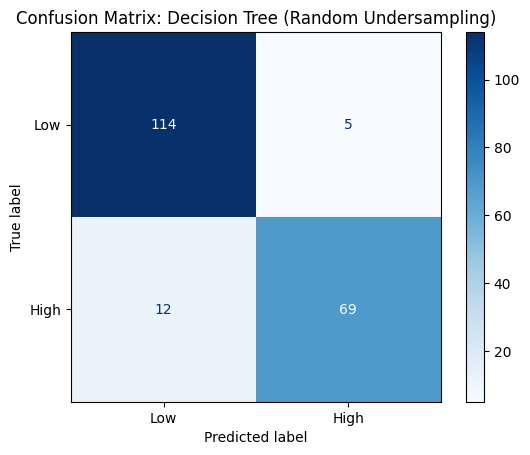


Decision Tree (Random Undersampling) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0
563,0.878413,-2.118187,1.044512,-2.362460,2.030140,1.525567,-0.133247,True,False,False,False,0,1
498,0.315075,0.371675,0.990677,0.701842,-1.126142,0.929521,-0.954914,False,False,False,True,0,1


------------------------------------------------------------


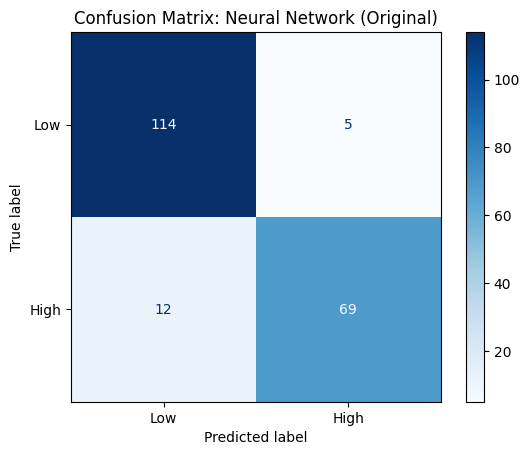


Neural Network (Original) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


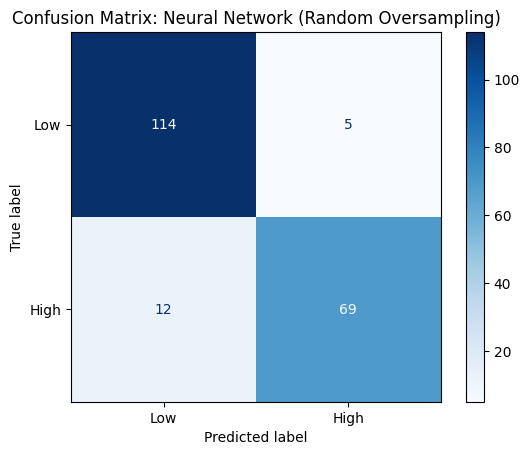


Neural Network (Random Oversampling) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


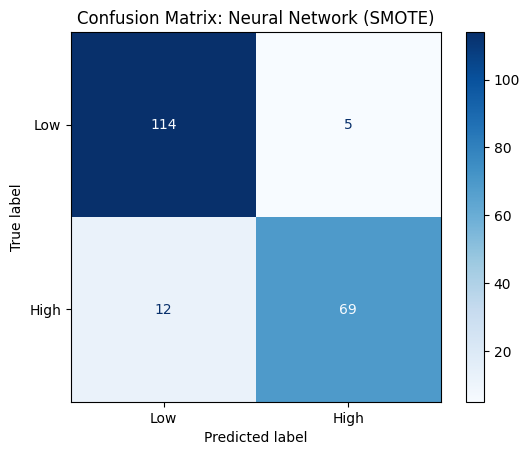


Neural Network (SMOTE) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


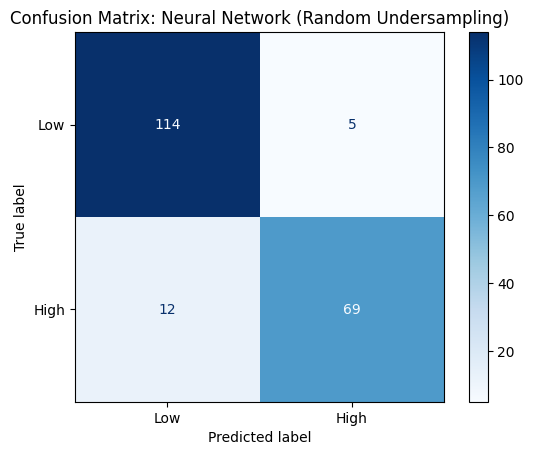


Neural Network (Random Undersampling) - Misclassified Instances: 17


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
40,1.215494,-1.456825,0.990677,-1.471174,0.337277,-0.912986,1.158941,False,False,False,True,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


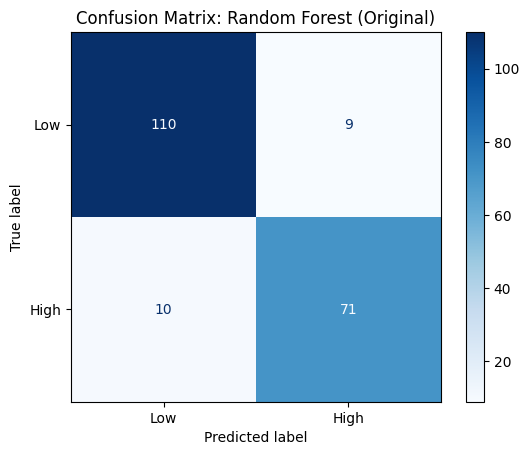


Random Forest (Original) - Misclassified Instances: 19


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
875,-0.501592,-1.393625,-0.520484,-0.873487,-0.583317,-0.432033,-0.802040,True,False,False,False,0,1
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


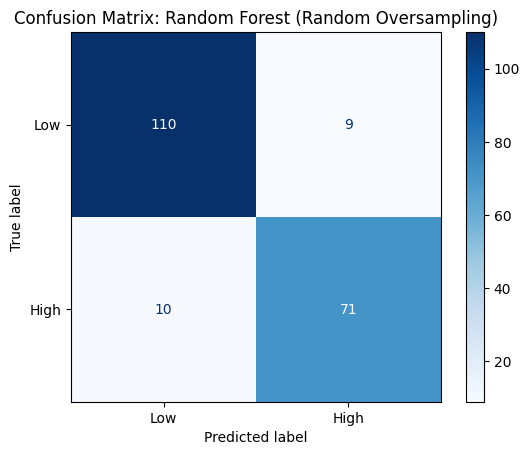


Random Forest (Random Oversampling) - Misclassified Instances: 19


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
875,-0.501592,-1.393625,-0.520484,-0.873487,-0.583317,-0.432033,-0.802040,True,False,False,False,0,1
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


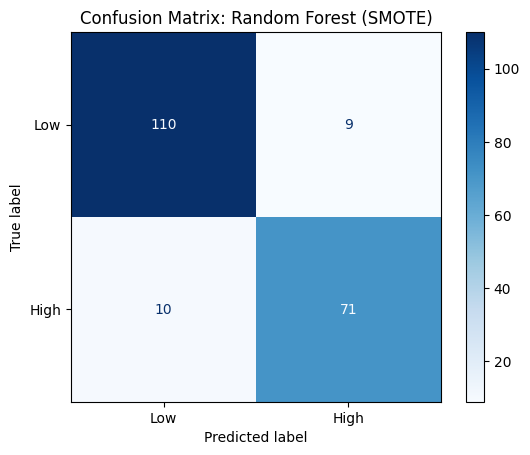


Random Forest (SMOTE) - Misclassified Instances: 19


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
875,-0.501592,-1.393625,-0.520484,-0.873487,-0.583317,-0.432033,-0.802040,True,False,False,False,0,1
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


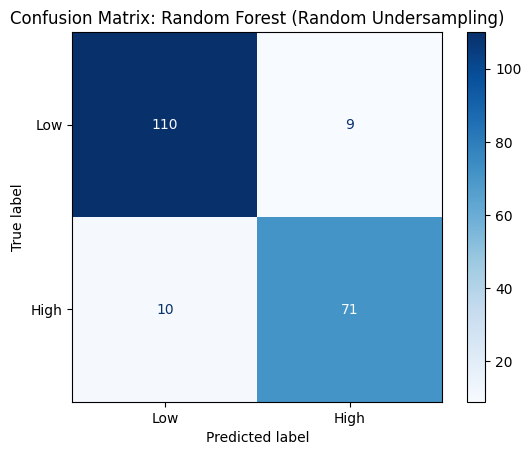


Random Forest (Random Undersampling) - Misclassified Instances: 19


,x1,x5,x6,x7,x8,x10,x13,x14_C1,x14_C2,x14_C3,x14_C4,True Label,Predicted Label
875,-0.501592,-1.393625,-0.520484,-0.873487,-0.583317,-0.432033,-0.802040,True,False,False,False,0,1
965,-0.301299,-1.126641,0.990677,-1.022226,-1.208606,-0.370654,-1.134772,False,False,False,True,1,0
168,-0.501592,-0.158327,-1.054225,-0.263449,-1.406162,-0.598055,-1.134772,False,False,False,True,1,0
286,-0.501592,-0.158327,0.990677,-0.263449,-1.406162,-0.598055,-1.134772,True,False,False,False,1,0
615,0.475798,-1.193600,-1.181431,-1.133652,-1.208955,0.054134,-0.954914,False,False,False,True,0,1
525,-0.501592,1.135906,-0.963163,-0.636473,-1.208606,-0.882914,-1.040983,False,True,False,False,1,0
493,-1.129798,-0.674195,1.125863,-1.719704,0.211149,-0.477554,-0.875547,False,False,False,True,0,1
782,-0.501592,0.660035,-0.791338,-1.584038,-0.921063,-1.161411,-1.040983,True,False,False,False,1,0
395,-0.138332,1.135906,-1.132962,-0.173405,-1.406388,-0.701214,-0.954914,False,False,False,True,1,0
235,-0.761200,-0.839214,-0.644955,-0.189043,-0.921003,-0.193781,-1.040983,False,False,True,False,1,0


------------------------------------------------------------


In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_and_misclassified(model, X_val, y_val, clf_name, dataset_name):
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {clf_name} ({dataset_name})")
    plt.show()
    
    # Identify misclassified instances
    misclassified_mask = (y_pred != y_val)
    misclassified_instances = X_val[misclassified_mask].copy()
    misclassified_instances['True Label'] = y_val[misclassified_mask].values
    misclassified_instances['Predicted Label'] = y_pred[misclassified_mask]
    
    print(f"\n{clf_name} ({dataset_name}) - Misclassified Instances: {len(misclassified_instances)}")
    if len(misclassified_instances) > 0:
        display(misclassified_instances.head(10))  # Show the top 10 misclassified instances
    print("-"*60)

# Now loop through your trained models and produce the confusion matrices and misclassified instances
for (clf_name, dataset_name), model in trained_models.items():
    show_confusion_and_misclassified(model, X_val, y_val, clf_name, dataset_name)


## 7- Final results on the test set

In [70]:
# Train the final model on the full training data
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_ros, y_train_ros)

# Evaluate on the test set
print("\nFinal Evaluation on Test Set:")
final_test_results = evaluate_model(rf_final, X_test, y_test)



Final Evaluation on Test Set:

Sensitivity (Recall for Positive Class): 0.9608
Specificity (Recall for Negative Class): 0.9643

G-Mean: 0.9625
ROC-AUC: 0.9919
